# K-Means Clustering: Advanced Theory & Interview Q&A

## Theory
K-Means is an unsupervised clustering algorithm that partitions data into K clusters by minimizing the within-cluster sum of squares. It uses iterative refinement and is sensitive to initial centroids and outliers. The algorithm converges when cluster assignments no longer change or the maximum number of iterations is reached.

| Aspect                | Details                                                                 |
|----------------------|-------------------------------------------------------------------------|
| Algorithm            | Iterative partitioning, centroid update                                 |
| Objective Function   | Minimize within-cluster sum of squares                                  |
| Initialization       | Random or k-means++                                                     |
| Strengths            | Simple, scalable, fast                                                  |
| Weaknesses           | Sensitive to initialization, outliers, assumes spherical clusters        |

## Advanced Interview Q&A
**Q1: How does k-means++ improve upon standard k-means initialization?**
A1: k-means++ selects initial centroids to maximize their distance, reducing the chance of poor clustering and improving convergence.

**Q2: What are the limitations of K-Means for non-spherical clusters?**
A2: K-Means assumes clusters are spherical and equally sized, so it struggles with elongated or uneven clusters.

**Q3: How do you determine the optimal number of clusters (K)?**
A3: Use methods like the Elbow method, Silhouette score, or Gap statistic.

**Q4: How can you handle outliers in K-Means?**
A4: Preprocess data to remove outliers or use algorithms like K-Medoids.

**Q5: What is the computational complexity of K-Means?**
A5: O(n * k * i * d), where n = samples, k = clusters, i = iterations, d = dimensions.

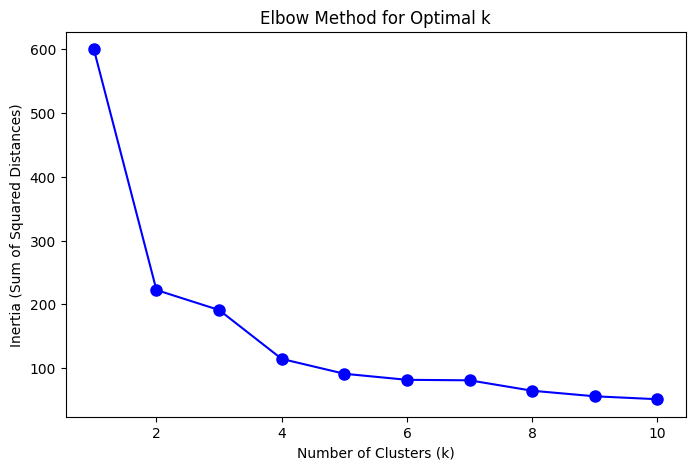

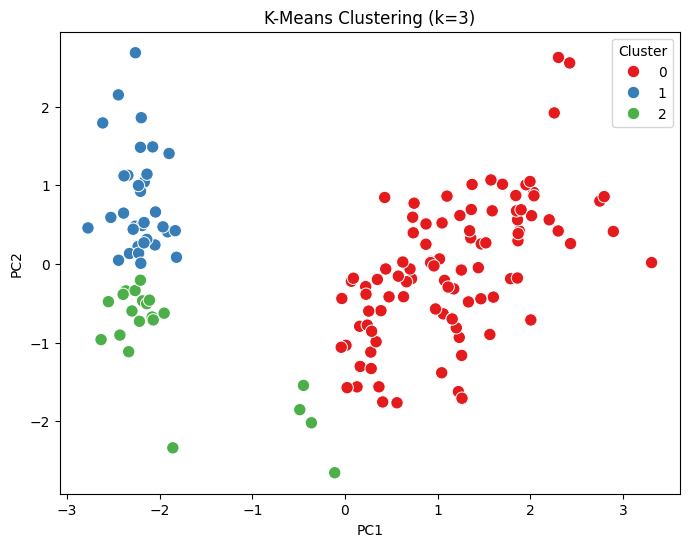

In [1]:
# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# 3️⃣ Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Determine Optimal Number of Clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

# 5️⃣ Apply K-Means with Chosen k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6️⃣ Visualize Clusters using first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=pca_df, s=80)
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.show()
